In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [9]:
#Lecture du fichier couleur
img = cv.imread("pikachu.jpg") #en couleur

In [5]:
imgtest = img[0:250,0:500]

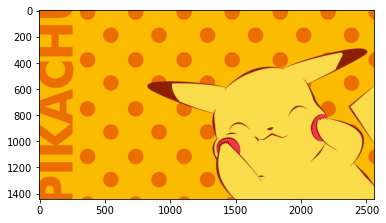

In [10]:
#Affichage de l'image
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


In [35]:
def coupe_en_4(img):
  height = img.shape[0]
  width = img.shape[1]
  height_sur2 = int(height/2)
  width_sur2 = int(width/2)
  sous_img = [img[0:height_sur2, 0:width_sur2], img[0:height_sur2, width_sur2:width], img[height_sur2:height, 0:width_sur2], img[height_sur2:height, width_sur2:width] ]

  return sous_img

In [36]:
split_img = coupe_en_4(img)
split_img[0].shape

(720, 1280, 3)

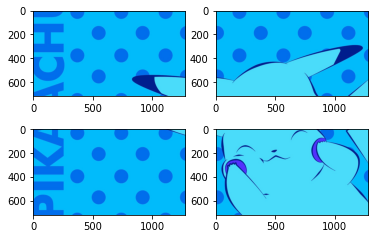

In [37]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(split_img[0])
axs[0, 1].imshow(split_img[1])
axs[1, 0].imshow(split_img[2])
axs[1, 1].imshow(split_img[3])

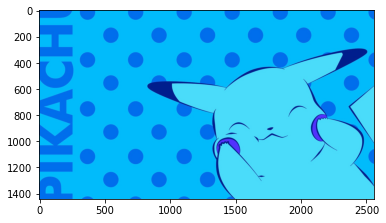

In [38]:
def concatener(nord_ouest, nord_est, sud_ouest, sud_est):
    haut = np.concatenate((nord_ouest, nord_est), axis=1)
    bas = np.concatenate((sud_ouest, sud_est), axis=1)
    return np.concatenate((haut, bas), axis=0)

full_img = concatener(split_img[0], split_img[1], split_img[2], split_img[3])
plt.imshow(full_img)
plt.show()

[[[  4 167 244]
  [ 20 180 244]]

 [[  1 168 247]
  [ 62 203 244]]]


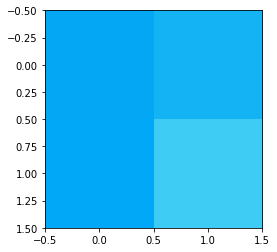

In [43]:
def calculate_mean(img):
    return np.mean(img, axis=(0, 1))

means = np.array(list(map(lambda x: calculate_mean(x), split_img))).astype(int).reshape(2,2,3)
print(means)
plt.imshow(means)
plt.show()

In [51]:
#Retourne vrai si tous les pixels de la liste sont égaux, faux sinon.
def checkEqual(myList):
    first=myList[0]
    return all((x==first).all() for x in myList)

#Définition de la classe QuadTree
class QuadTree:
    
    def insert(self, img, level = 0):
        self.level = level
        self.mean = calculate_mean(img).astype(int)
        self.resolution = (img.shape[0], img.shape[1])
        self.final = True
        
        if not checkEqual(img):
            split_img = coupe_en_4(img)
            
            self.final = False
            self.north_west = QuadTree().insert(split_img[0], level + 1)
            self.north_east = QuadTree().insert(split_img[1], level + 1)
            self.south_west = QuadTree().insert(split_img[2], level + 1)
            self.south_east = QuadTree().insert(split_img[3], level + 1)

        return self
    
    def get_image(self, level):
        if(self.final or self.level == level):
            return np.tile(self.mean, (self.resolution[0], self.resolution[1], 1))
        
        return concatener(
            self.north_west.get_image(level), 
            self.north_east.get_image(level),
            self.south_west.get_image(level),
            self.south_east.get_image(level))

In [47]:
quadtree = QuadTree().insert(img)

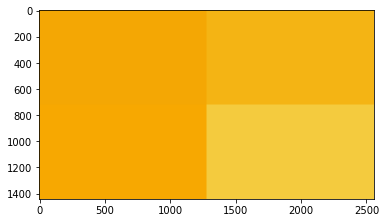

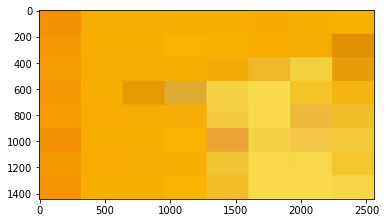

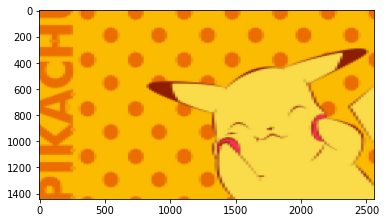

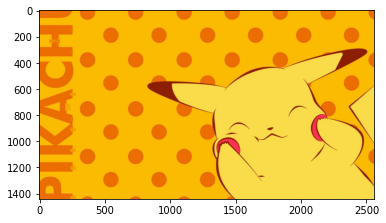

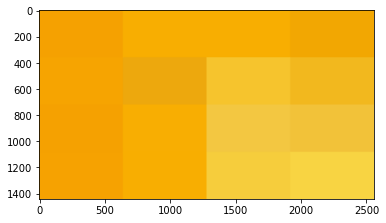

In [50]:
plt.imshow(quadtree.get_image(1)[...,::-1])
plt.show()
plt.imshow(quadtree.get_image(3)[...,::-1])
plt.show()
plt.imshow(quadtree.get_image(7)[...,::-1])
plt.show()
plt.imshow(quadtree.get_image(10)[...,::-1])
plt.show()

In [ ]:
img1, img2, img3, img4 = coupe_en_4(img)

In [ ]:
np.mean(img3)
np.var(img1)

221.84507733333334

In [ ]:
def merge_variance(img1, img2):
  var1 = np.var(img1)
  var2 = np.var(img2)
  var1_dixprct = var1/10
  res = var1-var2
  if(abs(res) < var1_dixprct):
    img_merge = cv.merge(img1, img2)
  return img_merge

In [ ]:
#Lecture du fichier couleur
img = cv.imread("rouge.png") #en couleur

In [ ]:
r,g,b = cv.split(img)